In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import os
import zipfile
import random
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Concatenate
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Dense
from keras.layers import BatchNormalization, Activation, Dropout, Subtract
from keras.models import Model
from glob import glob
from keras.layers.convolutional import Conv2DTranspose
from keras.layers import concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


loaded_model.load_weights("model.h5")


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train')))
# # 3600
# # 3600

3600
3600


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/')))
# # 354
# # 354

354
354


In [0]:
# ndct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train/*'))
# ldct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train/*'))

# ndct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/*'))
# ldct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/*'))

# print(len(ndct))
# print(len(ldct))
# print(len(ndct_test))
# print(len(ldct_test))

3600
3600
354
354


In [0]:
def cal_psnr(im1, im2):
    # assert pixel value range is 0-255 and type is uint8
    mse = ((im1.astype(np.float) - im2.astype(np.float)) ** 2).mean()
    maxval = np.amax(im1)
    psnr = 10 * np.log10(maxval ** 2 / mse)
    return psnr

def tf_psnr(im1, im2):
    # assert pixel value range is 0-1
    #mse = tf.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    mse = tf.compat.v1.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    return 10.0 * (tf.log(255.0 ** 2 / mse) / tf.log(10.0))

In [0]:
# ndct_imgs_train = []
# for i in range(0, len(ndct)):                                                                                                                                      
# #for i in range(0, 1600):
#     f = open(ndct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_train.append(a)
#     f.close()
# print("len(ndct_imgs_train)....: ",len(ndct_imgs_train))
                                                                                                                                                         

len(ndct_imgs_train)....:  3600


In [0]:
# ldct_imgs_train = []
# for i in range(0, len(ldct)):
# #for i in range(0, 1600):
#     f = open(ldct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_train.append(a)
#     f.close()
# print("len(ldct_imgs_train)....: ",len(ldct_imgs_train))

len(ldct_imgs_train)....:  3600


In [0]:
# ndct_imgs_test = []
# for i in range(0, len(ndct_test)):
# #for i in range(0, 10):
#     f = open(ndct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_test.append(a)
#     f.close()
# print("len(ndct_imgs_test)....: ",len(ndct_imgs_test))


len(ndct_imgs_test)....:  354


In [0]:
# # load the image
# ldct_imgs_test = []
# for i in range(0, len(ldct_test)):
# #for i in range(0, 10):
#     f = open(ldct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_test.append(a)
#     f.close()
# print("len(ldct_imgs_test)....: ",len(ldct_imgs_test))


len(ldct_imgs_test)....:  354


In [0]:
# ldct_train = np.asarray(ldct_imgs_train)
# ndct_train = np.asarray(ndct_imgs_train)

# ldct_train = ldct_train.reshape(3600,512,512,1)
# ndct_train = ndct_train.reshape(3600,512,512,1)

# ldct_test = np.asarray(ldct_imgs_test)
# ndct_test = np.asarray(ndct_imgs_test)

# ldct_test = ldct_test.reshape(len(ldct_imgs_test),512,512,1)
# ndct_test = ndct_test.reshape(len(ldct_imgs_test),512,512,1)

# print(ldct_train.shape)
# print(ndct_train.shape)
# print(ldct_test.shape)
# print(ndct_test.shape)


(3600, 512, 512, 1)
(3600, 512, 512, 1)
(354, 512, 512, 1)
(354, 512, 512, 1)


In [0]:
# np.save('sparseview_60_train', ldct_train) # save the file as "sparseview_60_train.npy" 
# np.save('ndct_train', ndct_train) # save the file as "ndct_train.npy" 

# np.save('sparseview_60_test', ldct_test) # save the file as "sparseview_60_test.npy" 
# np.save('ndct_test', ndct_test) # save the file as "ndct_test.npy" 


In [0]:
sparseview_60_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
ndct_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_train.npy') # loads saved array into variable ndct_train.
sparseview_60_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
ndct_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_test.npy') # loads saved array into variable ndct_test.

# sparseview_60_train = np.load('sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
# ndct_train = np.load('ndct_train.npy') # loads saved array into variable ndct_train.
# sparseview_60_test = np.load('sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
# ndct_test = np.load('ndct_test.npy') # loads saved array into variable ndct_test.


In [0]:
# class LossHistory(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
# history = LossHistory()

In [0]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto')

Basic UNet model

In [0]:
inputs = Input((None, None,1))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)


u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = Subtract()([inputs, output_img])


model = Model(inputs=[inputs], outputs=[subtracted])
model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])



In [19]:
history = model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=50, callbacks =[es])


Train on 3420 samples, validate on 180 samples
Epoch 1/50
3420/3420 [==============================] - 133s 39ms/step - loss: 0.0010 - tf_psnr: 30.3111 - val_loss: 4.4214e-04 - val_tf_psnr: 33.5523
Epoch 2/50
3420/3420 [==============================] - 131s 38ms/step - loss: 4.9239e-04 - tf_psnr: 33.0992 - val_loss: 3.9941e-04 - val_tf_psnr: 34.0015
Epoch 3/50
3420/3420 [==============================] - 131s 38ms/step - loss: 3.9034e-04 - tf_psnr: 34.1093 - val_loss: 3.1102e-04 - val_tf_psnr: 35.0795
Epoch 4/50
3420/3420 [==============================] - 131s 38ms/step - loss: 3.2238e-04 - tf_psnr: 34.9334 - val_loss: 2.7237e-04 - val_tf_psnr: 35.6908
Epoch 5/50
3420/3420 [==============================] - 131s 38ms/step - loss: 2.8094e-04 - tf_psnr: 35.5256 - val_loss: 2.2881e-04 - val_tf_psnr: 36.4600
Epoch 6/50
3420/3420 [==============================] - 131s 38ms/step - loss: 2.5522e-04 - tf_psnr: 35.9393 - val_loss: 2.2274e-04 - val_tf_psnr: 36.5812
Epoch 7/50
3420/3420 [=====

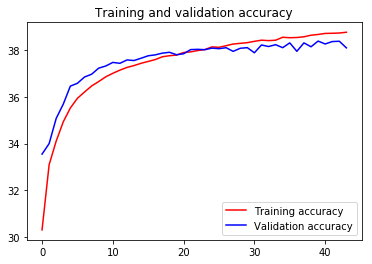

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['tf_psnr']
val_acc = history.history['val_tf_psnr']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [21]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 37.49435077487602


In [0]:
from PIL import Image

a = reconstructed[0].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_0_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/unet_colab5_0_50.png')

a = reconstructed[12].reshape(512, 512)
scalef = np.amax(a)
a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
#result = Image.fromarray((a * 255).astype(np.uint8))                                                                                                
result = Image.fromarray((a).astype(np.uint8))
result.save('unet_12_300.png')
result.save('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/unet_colab5_12_50.png')

In [0]:
model.save_weights("model.h5")

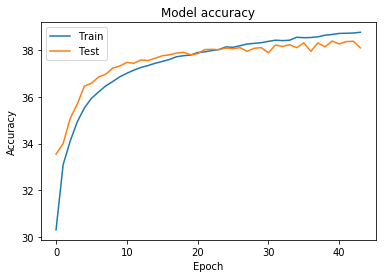

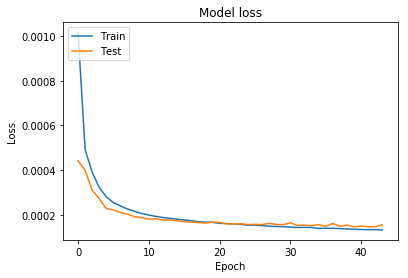

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['tf_psnr'])
plt.plot(history.history['val_tf_psnr'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()